# Data Preprocessing

## Read the data

In [61]:
import pandas as pd
import numpy as np

df = pd.read_excel('spotify-songs.xlsx')

df_original = df.__deepcopy__()

## Explore the data
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2001,It Wasn't Me,81,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0
1,2001,Survivor,73,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0
2,2001,Stan,84,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0
3,2001,Can't Get You out of My Head,80,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0
4,2001,Lady Marmalade - Single Edit,70,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0


## Check for missing values

In [62]:
df.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64

### Since there is only one null value, we can drop it

In [63]:
df = df.dropna()
df.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

## Compute number of songs per album (per artist)

In [64]:
# Compute number of songs per album (per artist)
album_song_counts = (
    df.groupby(['artist_name', 'album'])['track_name']
      .count()
      .rename('album_songs')
)

# Merge back into the original DataFrame
df = df.merge(album_song_counts, on=['artist_name', 'album'], how='left')
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_songs
0,2001,It Wasn't Me,81,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0,2
1,2001,Survivor,73,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0,3
2,2001,Stan,84,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0,1
3,2001,Can't Get You out of My Head,80,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0,2
4,2001,Lady Marmalade - Single Edit,70,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0,1


## Drop the columns that are not needed

In [65]:
drop_cols = ['year', 'track_name', 'album', 'artist_name']
df = df.drop(columns=drop_cols)
df.head()

,track_popularity,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_songs
0,81,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0,2
1,73,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0,3
2,84,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0,1
3,80,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0,2
4,70,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0,1


## Explore `track_popularity`

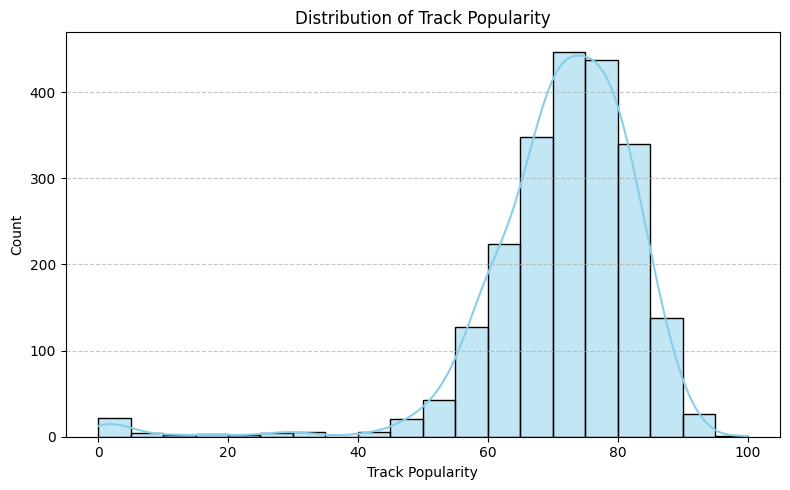

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of track popularity
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Create `popular` target column

In [67]:
df['popular'] = df['track_popularity'] >= df['track_popularity'].quantile(0.75)
df = df.drop(columns=['track_popularity']) # drop the original track_popularity column
df.head()

,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_songs,popular
0,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0,2,True
1,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0,3,False
2,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0,1,True
3,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0,2,True
4,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0,1,False


## Encode `artist_genres` (WORK IN PROGRESS)

In [68]:
# Get unique genres

genre_list = []

for i, row in df.iterrows():
    artist_genres = row['artist_genres']
    artist_genres = artist_genres.replace(';', ',')
    artist_genres = eval(artist_genres)
    for genre in artist_genres:
        genre_list.append(genre)

genre_list = list(set(genre_list))

In [69]:
# Get the top most used genres

PERCENTAGE_OF_SONGS = 0.10 # % of the total songs
MIN_OCCURRENCES = df.shape[0] * PERCENTAGE_OF_SONGS

genre_counts = {}

for genre in genre_list:
    genre_counts[genre] = df[df['artist_genres'].str.contains(genre)]['artist_genres'].count()

genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
# keep only genre with count > MIN_OCCURRENCES
genre_counts = [item for item in genre_counts if item[1] > MIN_OCCURRENCES]

print(f"Showing only genres with at least {MIN_OCCURRENCES} occurrences: ({PERCENTAGE_OF_SONGS * 100}% of the total songs)")
for genre, count in genre_counts:
    print(f"{genre}: {count}")


Showing only genres with at least 219.9 occurrences: (10.0% of the total songs)
pop: 1644
rap: 627
dance pop: 513
hip hop: 464
pop rap: 304
rock: 297
r&b: 241


In [70]:
# Create columns for each genre and set to 1 if the song belongs to that genre, 0 otherwise
for genre, _ in genre_counts:
    df[f"genre_{genre}"] = df['artist_genres'].str.contains(genre).astype(int)

df = df.drop(columns=['artist_genres']) # drop the original artist_genres column

df.sample(5)

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,album_songs,popular,genre_pop,genre_rap,genre_dance pop,genre_hip hop,genre_pop rap,genre_rock,genre_r&b
1435,69,0.526,0.862,2.0,77.0,1.0,0.0905,0.014400,0.059700,0.2290,...,195200.0,4,True,1,0,0,0,0,1,0
351,55,0.643,0.569,7.0,87.0,1.0,0.0276,0.544000,0.000022,0.1780,...,244600.0,1,False,1,0,0,0,0,1,0
1942,60,0.674,0.774,11.0,87.0,0.0,0.0892,0.068600,0.001880,0.3930,...,176547.0,1,False,1,0,0,0,0,0,0
1179,79,0.597,0.919,7.0,47.0,1.0,0.0439,0.000145,0.000000,0.2820,...,255587.0,5,False,1,0,1,0,0,0,0
1566,63,0.672,0.625,7.0,70.0,0.0,0.0468,0.077400,0.000000,0.0934,...,208729.0,1,False,1,0,0,0,0,0,0


Number of songs with no genres assigned: 167 out of 2199


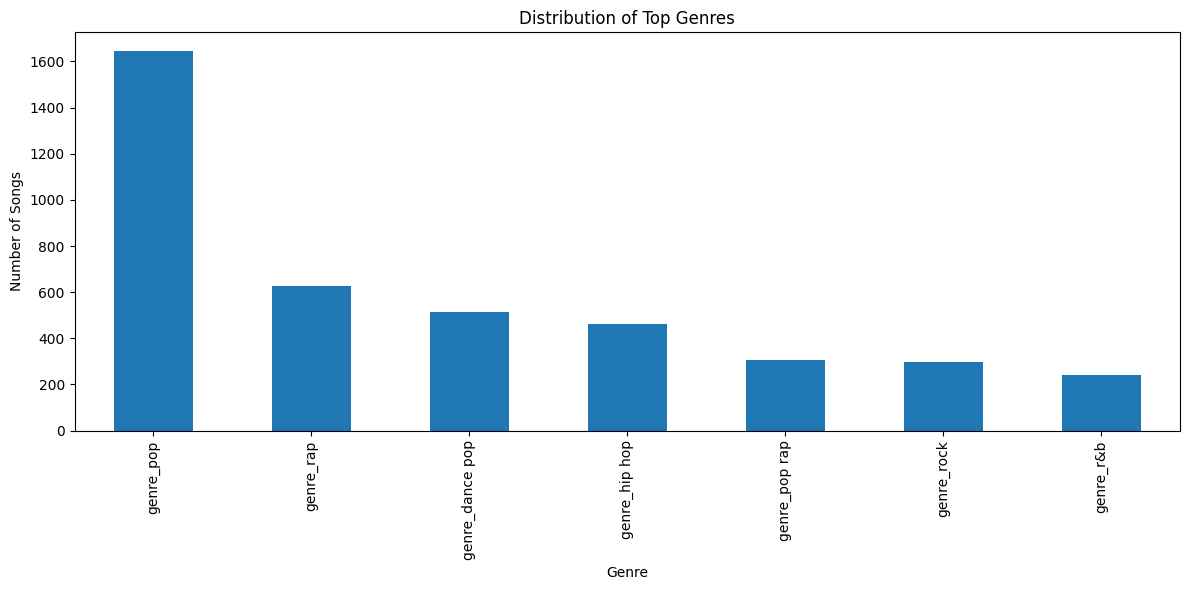

In [71]:
# Plot the distribution of the genres

genre_columns = [col for col in df.columns if col.startswith('genre_')]
import matplotlib.pyplot as plt

# Sum across all songs to get the count of each genre
genre_distribution = df[genre_columns].sum().sort_values(ascending=False)

# Calculate how many rows have no genres
no_genre_rows = (df[genre_columns].sum(axis=1) == 0).sum()
print(f"Number of songs with no genres assigned: {no_genre_rows} out of {df.shape[0]}")

plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Distribution of Top Genres')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Export preprocessed data

In [72]:
df.to_csv('spotify-songs-preprocessed.csv', index=False)